# Feature Scaling 

# Prepare Data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

# dataset
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [2]:
boston_dataset = load_boston()

In [3]:
df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

# add target 
df['MEDV'] = boston_dataset.target

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# dataset 
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# check mean is not 0 and std is not 1. They are on a different scale 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Split data 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), 
                                                    df['MEDV'], 
                                                    test_size=0.3, 
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [8]:
# original data 
X_train.describe().loc[['mean', 'std'], :].round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1


In [9]:
def plot(X_train, X_train_scaled):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # before sacling 
    ax1.set_title('Before Scaling')
    sns.kdeplot(X_train['RM'], ax=ax1)
    sns.kdeplot(X_train['LSTAT'], ax=ax1)
    sns.kdeplot(X_train['CRIM'], ax=ax1)
    sns.kdeplot(X_train['AGE'], ax=ax1)
    sns.kdeplot(X_train['DIS'], ax=ax1)
    sns.kdeplot(X_train['NOX'], ax=ax1)

    # after sacling 
    ax2.set_title('After Scaling')
    sns.kdeplot(X_train_scaled['RM'], ax=ax2)
    sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
    sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
    sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
    sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
    sns.kdeplot(X_train_scaled['NOX'], ax=ax2)

    plt.tight_layout()
    plt.show()

# 1. Standardization (StandardScaler)
**Definition**
- Scale data so that the mean becomes 0 and the stadard deviation becomes 1
- The value produced by this process is called Z-score 
$$
Z-score = \frac{X - mean(X)}{std(X)}
$$
- Z-score represents the position of a value with respect to the mean of the variable

**Characteristics** 
- It centers the variable to 0 and sets the variance to 1 
- It preserves the original distribution
    - If the original distribution was Gaussian, the transformed distribution will also be Gaussian. If it was skewed, the output will be skewed. 
- It preserves outliers

In [10]:
# set up the scaler 
scaler = StandardScaler()

# fit the scaler to the train set 
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# put them in dataframe 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
# transformed data 
X_train_scaled.describe().loc[['mean', 'std'], :].round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
mean,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


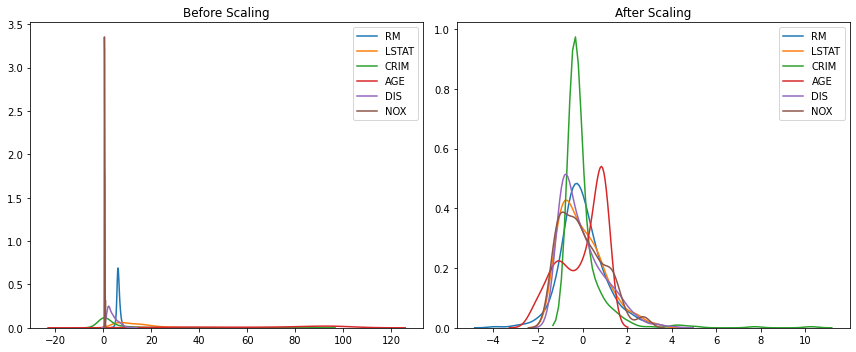

In [12]:
plot(X_train, X_train_scaled)

# 2. Mean Normalization (StandardScaler + RobustScaler)

In [13]:
# Set up the StandardScaler so that it removes the mean 
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# Set up the RobustScaler so that it does NOT remove the median 
# but normalize by max()-min(). Important to set up the quantile range
# to 0 to 100, which represents the min and max values
scaler_minmax = RobustScaler(with_centering=False,
                            with_scaling=True,
                            quantile_range=(0, 100))

# fit the scaler to the train set 
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

# put them in dataframe 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
# transformed data: mean is all 0 but std are different
X_train_scaled.describe().loc[['mean', 'std'], :].round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
mean,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2


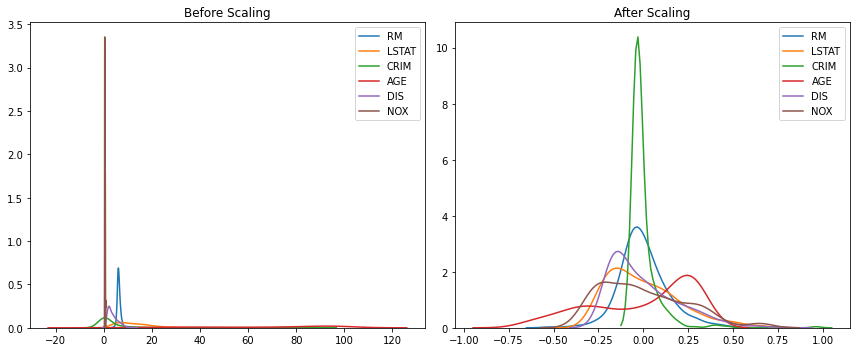

In [15]:
# all from -1 to 0
plot(X_train, X_train_scaled)

# 3. Min-max Normalization (MinMaxScaler)

In [16]:
# set up the scaler 
scaler = MinMaxScaler()

# fit the scaler to the train set 
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# put them in dataframe 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [17]:
# transformed data: both mean and std are different
X_train_scaled.describe().loc[['mean', 'std'], :].round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
mean,0.0,0.1,0.4,0.1,0.4,0.5,0.7,0.2,0.4,0.4,0.6,0.9,0.3
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2


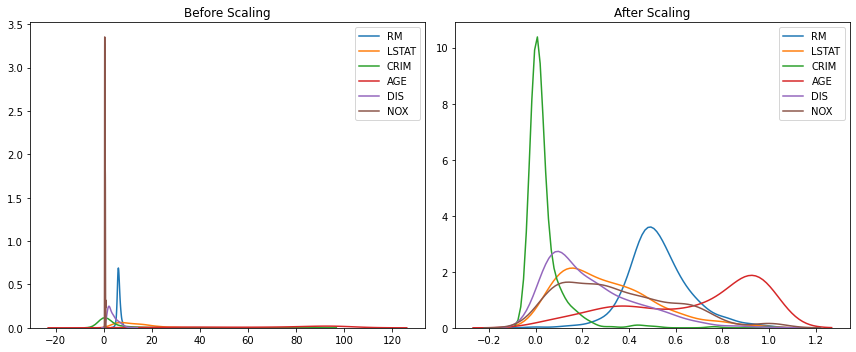

In [18]:
# all different scale. all starting from 0. (hist plot will show it more clearly)
plot(X_train, X_train_scaled)

# 4. Maximum absolute scaling (MaxAbsScaler)

$$X_{scaled} = \frac{X}{max(X)}$$

In [19]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)


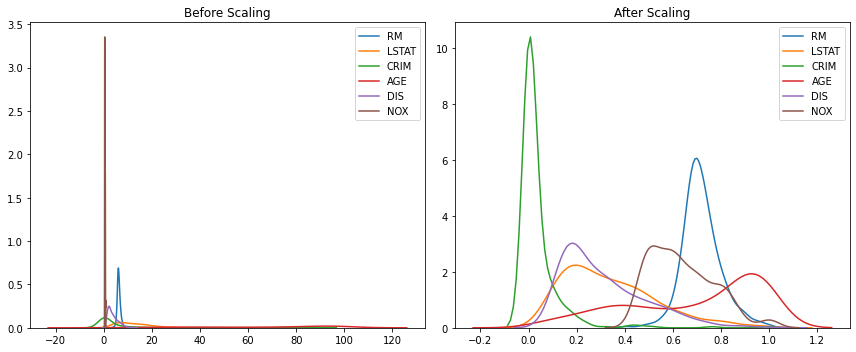

In [20]:
plot(X_train, X_train_scaled)

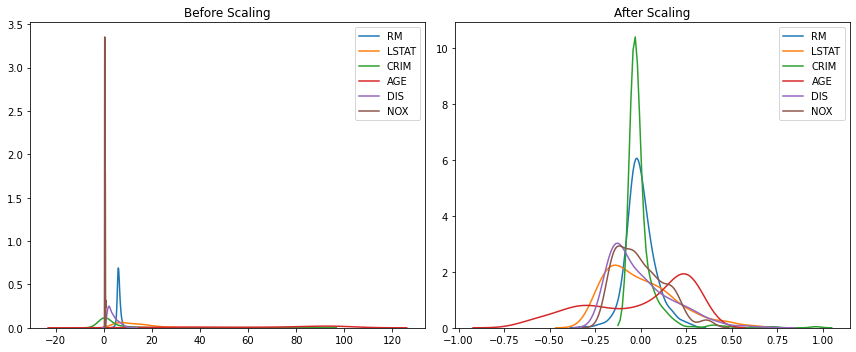

In [21]:
# centering + MaxAbsScaling: center distribution at zero and then scale to its absolute maximum. recommended by sklearn

scaler_mean = StandardScaler(with_mean=True, with_std=False)
scaler_maxabs = MaxAbsScaler()

scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)

X_train_scaled = pd.DataFrame(scaler_maxabs.transform(scaler_mean.transform(X_train)), columns=X_train.columns)
plot(X_train, X_train_scaled)

# 5. Median and quantile scaling (RobustScaler)

$$ X_{scaled} = \frac{X-median(X)}{75th quantile(X) - 25th quantile(X)}$$ 

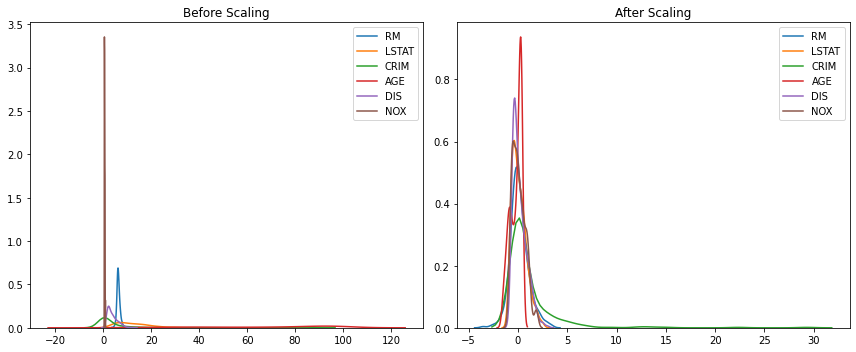

In [22]:
from sklearn.preprocessing import RobustScaler 

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

plot(X_train, X_train_scaled)

# 6. Scaling to vector unit length

Divide each feature vector by either Manhattan distance or Euclidean distance 
* Manhattan distance (L1 norm)
  $$L1(X) = |X_1| + |X_2| + ... + |X_n| $$
* Euclidean distance (L2 norm)
  $$L2(X) = \sqrt{X_1^2 + X_2^2 + ... + X_n^2} $$

In [23]:
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.450778,0.00,1.013688,0.0,0.479777,-1.591090,0.423057,-0.597749,-0.05,0.323077,0.750000,0.269706,2.329076
1,-0.048860,1.00,-0.121673,0.0,-0.412831,0.428856,-0.427174,0.236165,-0.10,-0.225641,-0.178571,0.170890,-0.343601
2,0.097391,0.00,1.013688,0.0,0.479777,0.158910,0.386001,-0.371847,-0.05,0.323077,0.750000,0.156119,0.581017
3,-0.065341,3.50,-0.480608,0.0,-0.769874,0.172207,-1.221822,1.552033,0.00,0.120513,-1.535714,-1.190118,-0.620085
4,-0.055992,0.00,1.299620,0.0,0.239888,-0.338431,0.276891,-0.379856,-0.15,-0.315385,0.000000,-0.688399,0.678187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.007016,0.00,-0.089734,0.0,-0.251046,-0.674867,-0.106022,0.506587,0.00,-0.061538,0.178571,-0.024195,0.058102
350,-0.058087,2.25,-0.389354,0.0,-0.563459,1.279920,-1.094184,1.098413,0.00,0.223077,-1.392857,-0.056794,-0.830453
351,-0.036855,0.00,0.110266,0.0,0.050209,-0.258644,0.064848,-0.157589,0.05,0.310256,-0.464286,0.147969,-0.086151
352,-0.011019,0.00,-0.125475,0.0,-0.502092,-0.246676,0.124550,0.832433,-0.10,-0.200000,-0.428571,0.057812,0.765339


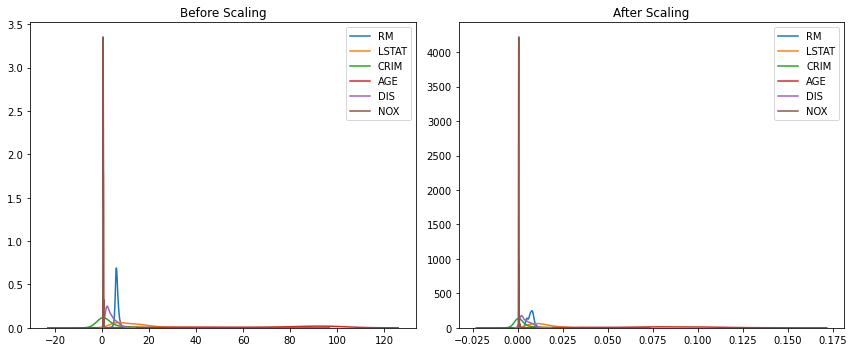

In [24]:
from sklearn.preprocessing import Normalizer

# Manhattan distance
scaler = Normalizer(norm='l1')  # or l2
scaler.fit(X_train) # this does nothing
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns) # actual transform
plot(X_train, X_train_scaled)

<AxesSubplot:>

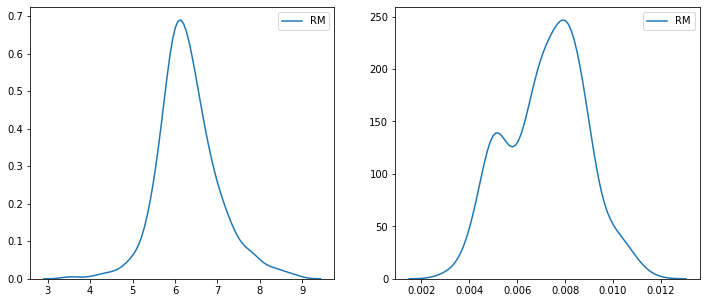

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(X_train['RM'], ax=ax[0])
sns.kdeplot(X_train_scaled['RM'], ax=ax[1])

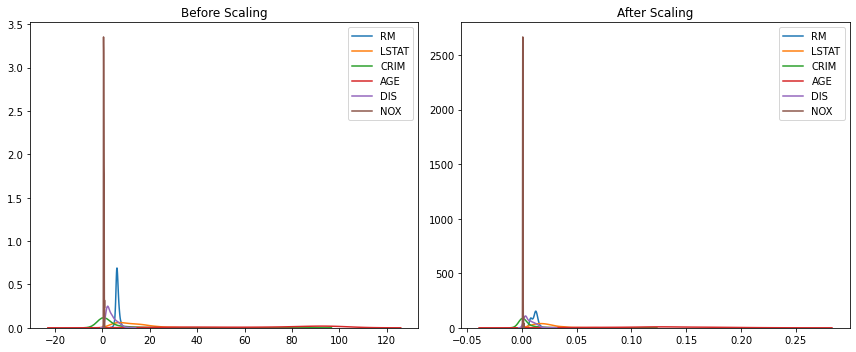

In [26]:
# Manhattan distance
scaler = Normalizer(norm='l2')  # or l2
scaler.fit(X_train) # this does nothing
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns) # actual transform
plot(X_train, X_train_scaled)

<AxesSubplot:>

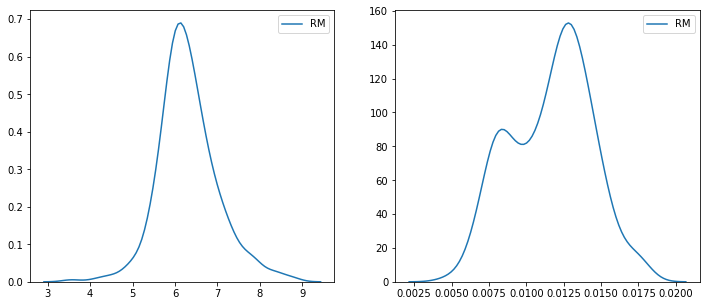

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(X_train['RM'], ax=ax[0])
sns.kdeplot(X_train_scaled['RM'], ax=ax[1])